<a href="https://colab.research.google.com/github/pkmariya/Scaler01/blob/master/Yulu_CaseStudy_Mariya_DSMLJun22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objective

## Objective
### Yulu wants to know, 
*   Which variables are significant in predicting the demand for shared electric cycles in the Indian market?
*   How well those variables describe the electric cycle demands

### Import Packages

In [2]:
# Import required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


### Import/Read Data

In [4]:
# Import/Read dataset
yulu_df = pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089")

# Statistical Summary

### Meta-Data of Dataset

#### Basic Info of the dataset

In [67]:
# Basic info about the dataset
yulu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


#### Size of the dataset

In [68]:
# Size of the dataset
yulu_df.size

130632

#### Number of Rows and Columns

In [69]:
# Number of Rows and columns in the dataset
print("Yulu dataset contains {} rows and {} columns".format(yulu_df.shape[0], yulu_df.shape[1]))

Yulu dataset contains 10886 rows and 12 columns


#### Numerical data in the dataset

In [70]:
# Numerical columns in the dataset
yulu_df.describe()

season       holiday    workingday       weather         temp  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.00000   
mean       2.506614      0.028569      0.680875      1.418427     20.23086   
std        1.116174      0.166599      0.466159      0.633839      7.79159   
min        1.000000      0.000000      0.000000      1.000000      0.82000   
25%        2.000000      0.000000      0.000000      1.000000     13.94000   
50%        3.000000      0.000000      1.000000      1.000000     20.50000   
75%        4.000000      0.000000      1.000000      2.000000     26.24000   
max        4.000000      1.000000      1.000000      4.000000     41.00000   

              atemp      humidity     windspeed        casual    registered  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      23.655084     61.886460     12.799395     36.021955    155.552177   
std        8.474601     19.245033      8.164537     49.960477    151.039033   
min        0.760000      0.000000      0.000000      0.000000      0.000000   
25%       16.665000     47.000000      7.001500      4.000000     36.000000   
50%       24.240000     62.000000     12.998000     17.000000    118.000000   
75%       31.060000     77.000000     16.997900     49.000000    222.000000   
max       45.455000    100.000000     56.996900    367.000000    886.000000   

              count  
count  10886.000000  
mean     191.574132  
std      181.144454  
min        1.000000  
25%       42.000000  
50%      145.000000  
75%      284.000000  
max      977.000000

#### Categorical data in the dataset

In [71]:
# Categorical columns in the dataset
yulu_df.describe(include="O")

datetime
count                 10886
unique                10886
top     2011-01-01 00:00:00
freq                      1

#### List of Columns

In [72]:
# Column Nams
list(yulu_df.columns)

['datetime',
 'season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'casual',
 'registered',
 'count']

#### Datatypes of Columns

In [73]:
# Datatype of the columns
yulu_df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [74]:
# First 5 Rows
yulu_df.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1

#### Column - Unique values Count

# Data Pre-Processing

#### Copy dataset

In [5]:
# Take a copy of the dataset
yulu = yulu_df.copy()

#### Null value check

In [76]:
# Check for Null Values
yulu.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [77]:
yulu.isnull().sum().sum()

0

##### **Insight**: *There is no null value in the given dataset*

#### Check for duplicates

In [78]:
yulu.duplicated().sum()

0

##### **Insight**: *There is no duplicate in the given dataset*

In [79]:
# Unique values of each column
yulu.nunique()

datetime      10886
season            4
holiday           2
workingday        2
weather           4
temp             49
atemp            60
humidity         89
windspeed        28
casual          309
registered      731
count           822
dtype: int64

#### Convert to appropriate type

In [80]:
# Check for Season values
yulu['season'].unique()

array([1, 2, 3, 4])

In [6]:
# Convert the season to category type
yulu['season'] = yulu['season'].astype('category')

In [82]:
yulu['season'].replace([1,2,3,4],['Spring','Summer', 'Fall', 'Winter'],inplace=True)

In [83]:
yulu['season'].unique()

array(['Spring', 'Summer', 'Fall', 'Winter'], dtype=object)

In [84]:
yulu['holiday'].unique()

array([0, 1])

In [7]:
yulu['holiday'].replace([0,1], ['No', 'Yes'], inplace=True)

In [86]:
yulu['workingday'].unique()

array([0, 1])

In [8]:
yulu['workingday'].replace([0,1], ['No', 'Yes'], inplace=True)

In [88]:
yulu['weather'].unique()

array([1, 2, 3, 4])

In [9]:
yulu['weather'].replace({1:"Clear_Few Clouds",2:"Mist_cloudy",3:"Light rain_Light snow_Thunderstorm",4:'Heavy Rain_Ice Pallets_Thunderstorm_Mist'},inplace=True)

In [90]:
yulu.dtypes

datetime       object
season         object
holiday        object
workingday     object
weather        object
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

# Exploratory Data Analysis (EDA)

In [91]:
# Segregate numerical columns
numerical_columns = yulu.select_dtypes([np.int64, np.float64])

#### Pairplots to understand Numerical Variables

<function matplotlib.pyplot.show(*args, **kw)>

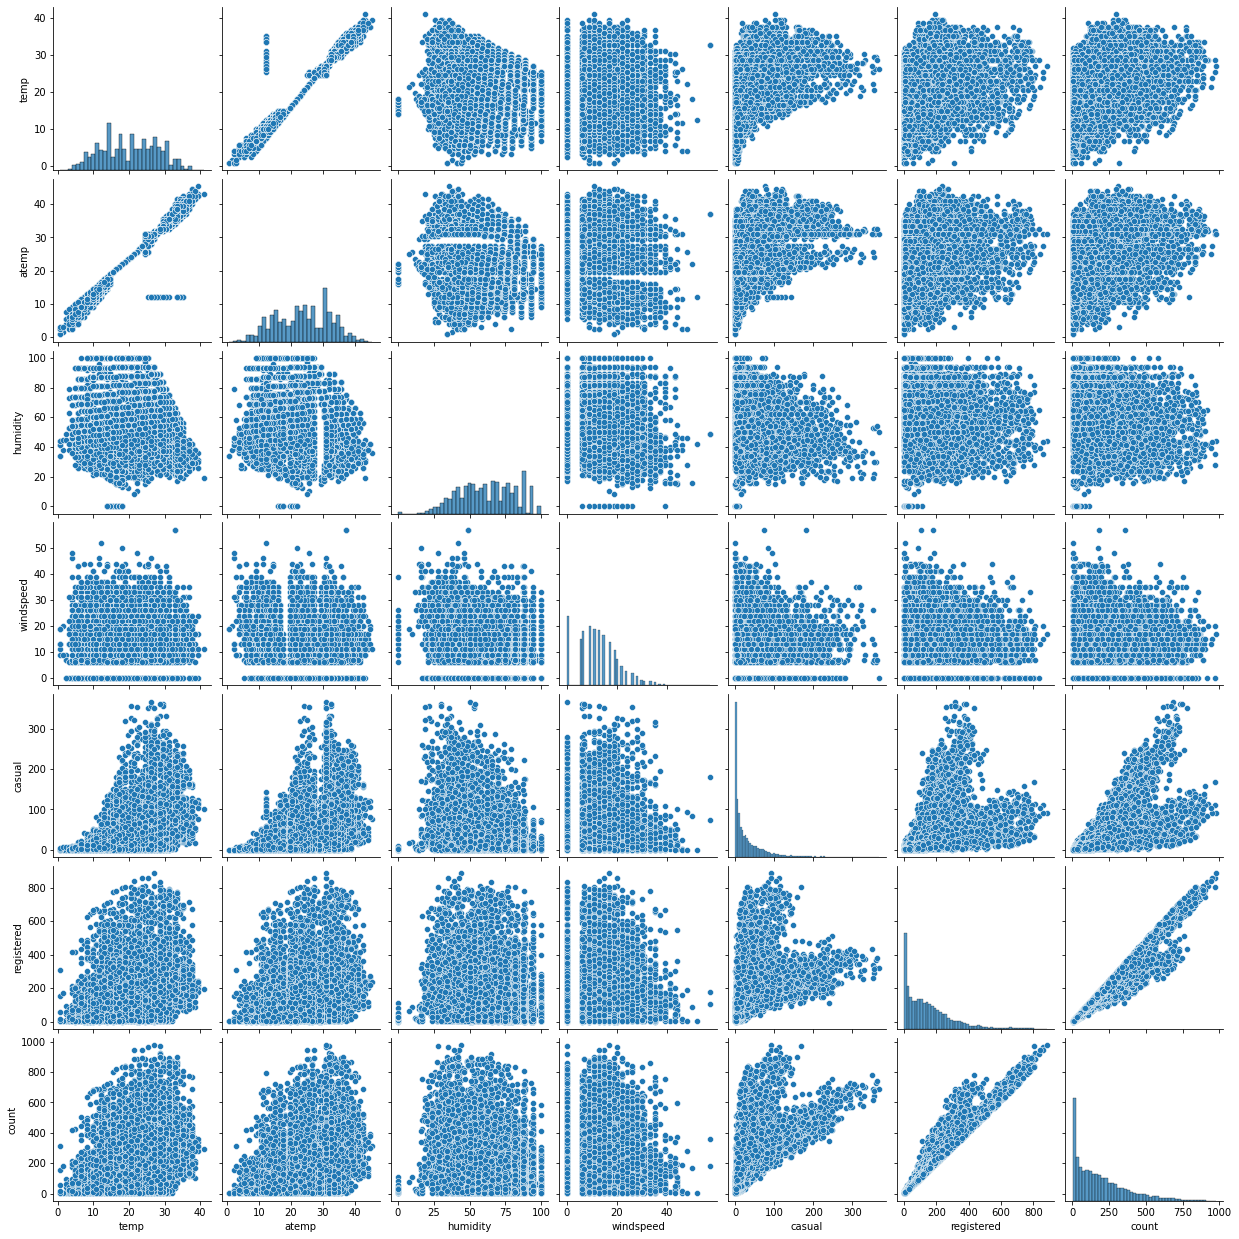

In [92]:
sns.pairplot(yulu, vars=numerical_columns)
plt.show

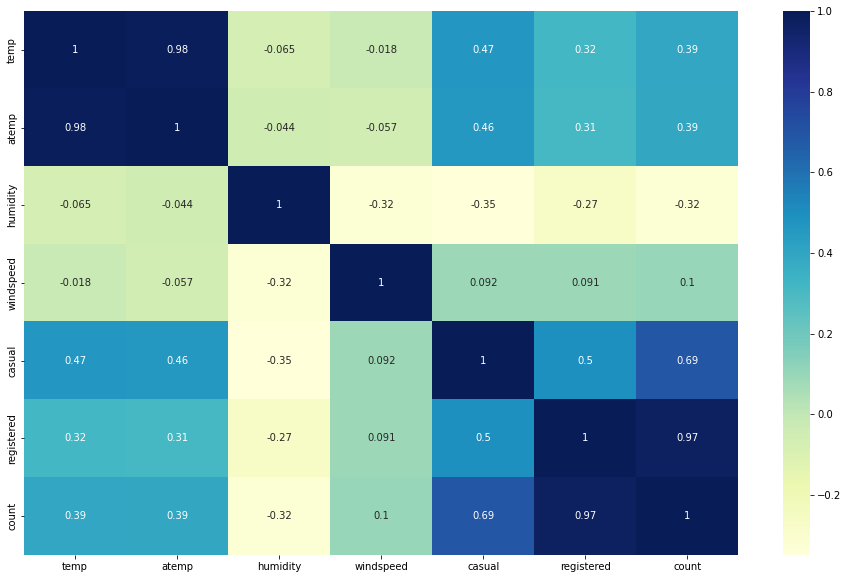

In [93]:
# from above graphs temp and atemp seems to have a relationship
# let's check the correlation
plt.figure(figsize = (16, 10))
sns.heatmap(yulu.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [94]:
# correlation between temp and atemp is 0.98 which is close to 1
# Let's drop atemp and consider temp

yulu.drop(['atemp'],axis=1,inplace=True)
yulu.head()

datetime  season holiday workingday           weather  temp  \
0  2011-01-01 00:00:00  Spring      No         No  Clear_Few Clouds  9.84   
1  2011-01-01 01:00:00  Spring      No         No  Clear_Few Clouds  9.02   
2  2011-01-01 02:00:00  Spring      No         No  Clear_Few Clouds  9.02   
3  2011-01-01 03:00:00  Spring      No         No  Clear_Few Clouds  9.84   
4  2011-01-01 04:00:00  Spring      No         No  Clear_Few Clouds  9.84   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1

### Categorical Variable Analysis

In [111]:
print(f"Categorical Variables are: {yulu.select_dtypes(['object']).columns}")

Categorical Variables are: Index(['datetime', 'season', 'holiday', 'workingday', 'weather'], dtype='object')


In [112]:
for col in yulu.select_dtypes('object'):
  display(yulu[col].unique())

array(['2011-01-01 00:00:00', '2011-01-01 01:00:00',
       '2011-01-01 02:00:00', ..., '2012-12-19 21:00:00',
       '2012-12-19 22:00:00', '2012-12-19 23:00:00'], dtype=object)

array(['Spring', 'Summer', 'Fall', 'Winter'], dtype=object)

array(['No', 'Yes'], dtype=object)

array(['No', 'Yes'], dtype=object)

array(['Clear_Few Clouds', 'Mist_cloudy',
       'Light rain_Light snow_Thunderstorm',
       'Heavy Rain_Ice Pallets_Thunderstorm_Mist'], dtype=object)

### Visual Analysis
#### Univariate Analysis

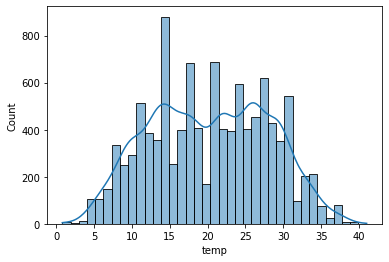

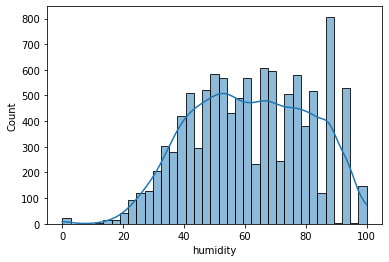

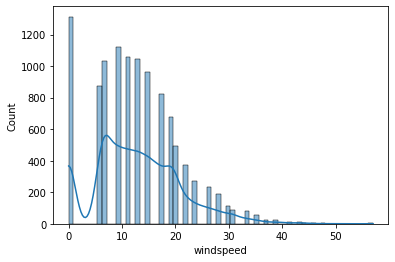

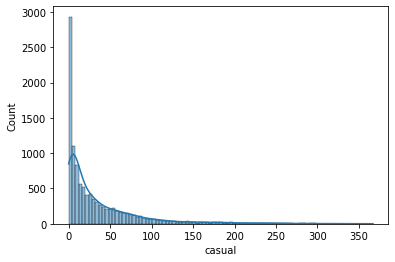

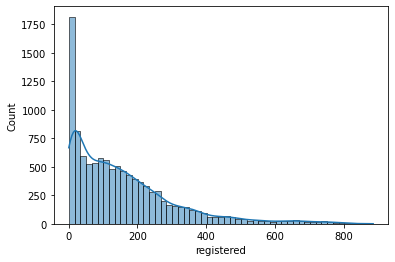

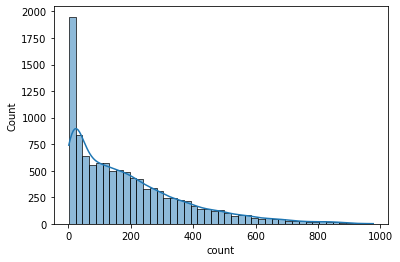

In [117]:
numerical_columns = yulu.select_dtypes([np.int64, np.float64])
for col in numerical_columns:
  num_graph = sns.histplot(data=yulu, x=col, kde=True) 
  plt.show()
  print()

In [122]:
yulu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  object 
 2   holiday     10886 non-null  object 
 3   workingday  10886 non-null  object 
 4   weather     10886 non-null  object 
 5   temp        10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   casual      10886 non-null  int64  
 9   registered  10886 non-null  int64  
 10  count       10886 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 935.6+ KB


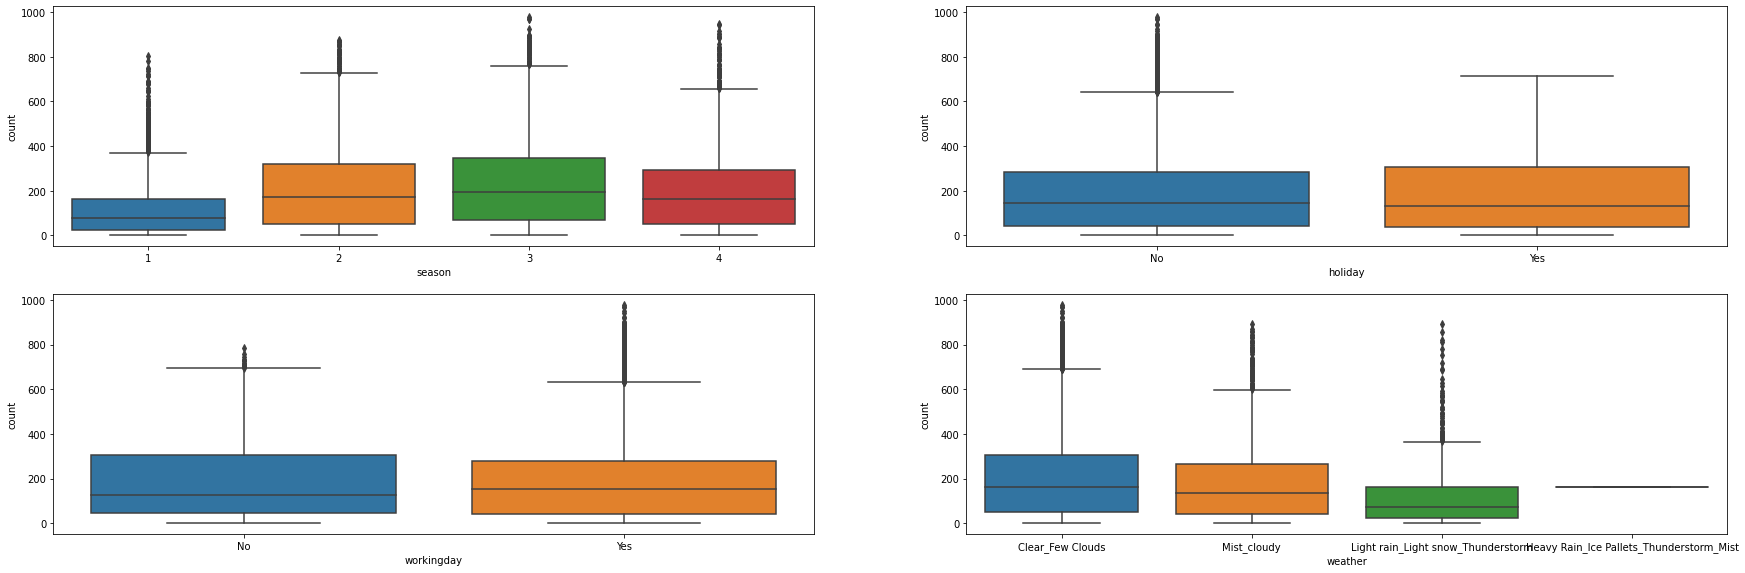

In [13]:
# Visualising categorical Variables to understand data better
plt.figure(figsize=(30, 15))
plt.subplot(3,2,1)
sns.boxplot(x = 'season', y = 'count', data = yulu)
plt.subplot(3,2,2)
sns.boxplot(x = 'holiday', y = 'count', data = yulu)
plt.subplot(3,2,3)
sns.boxplot(x = 'workingday', y = 'count', data = yulu)
plt.subplot(3,2,4)
sns.boxplot(x = 'weather', y = 'count', data = yulu)
plt.show()